### <center>📜 **<font color="yellow">Question 1:</font> Why is the distribution between counties uneven?** </center>

#### 📙**Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

### ✨ **1. Get data preprocessing**

In [2]:
df = pd.read_csv('../data/processed/VN_housing_dataset.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.head()

,date,address,district,town,house_type,paper_type,num_floors,num_rooms,squares,price_per_m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5,46,86.96
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Chưa có sổ,0,3,37,116.22
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4,40,65.00
3,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,0,6,51,100.00
4,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",Chưa có sổ,0,4,36,86.11


### 🖊 **2. Count number district in HCM city in year that have number published most of rooms**

In [3]:
df['district'].value_counts()

district
Quận Đống Đa         13815
Quận Thanh Xuân      12750
Quận Hoàng Mai       11040
Quận Hai Bà Trưng    10369
Quận Hà Đông          7756
Quận Cầu Giấy         6543
Quận Ba Đình          4650
Quận Long Biên        4187
Quận Nam Từ Liêm      3155
Quận Tây Hồ           2921
Quận Bắc Từ Liêm      1518
Huyện Thanh Trì       1188
Quận Hoàn Kiếm         527
Huyện Hoài Đức         444
Huyện Gia Lâm          267
Huyện Đông Anh          91
Huyện Thanh Oai         51
Huyện Sóc Sơn           39
Huyện Đan Phượng        22
Huyện Quốc Oai          20
Huyện Chương Mỹ         18
Huyện Thường Tín        16
Thị xã Sơn Tây          16
Huyện Mê Linh           11
Huyện Thạch Thất         9
Huyện Ba Vì              3
Huyện Phúc Thọ           2
Huyện Phú Xuyên          1
Huyện Mỹ Đức             1
Name: count, dtype: int64

### 📍 **3. Visualize number of houses for rent in each district of Ho Chi Minh City**

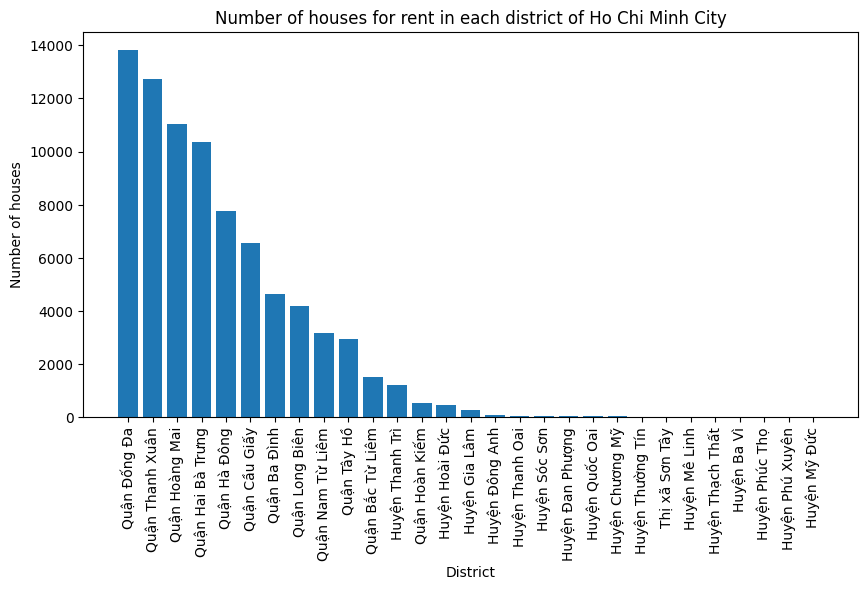

In [4]:
# visualize result with bar chart
plt.figure(figsize=(10, 5))
plt.bar(df['district'].value_counts().index, df['district'].value_counts().values)
plt.xticks(rotation=90)
plt.xlabel('District')
plt.ylabel('Number of houses')
plt.title('Number of houses for rent in each district of Ho Chi Minh City')
plt.show()

### 📍**5. Get top 3 district have highest number and lowest number of houses for rent in HCM city**

In [8]:
top_3_district_highest = df['district'].value_counts().head(3).index
top_3_district_lowest = df['district'].value_counts().tail(3).index

##### Visualize top 5 district have highest number and lowest number of houses for rent in HCM city to compare about price

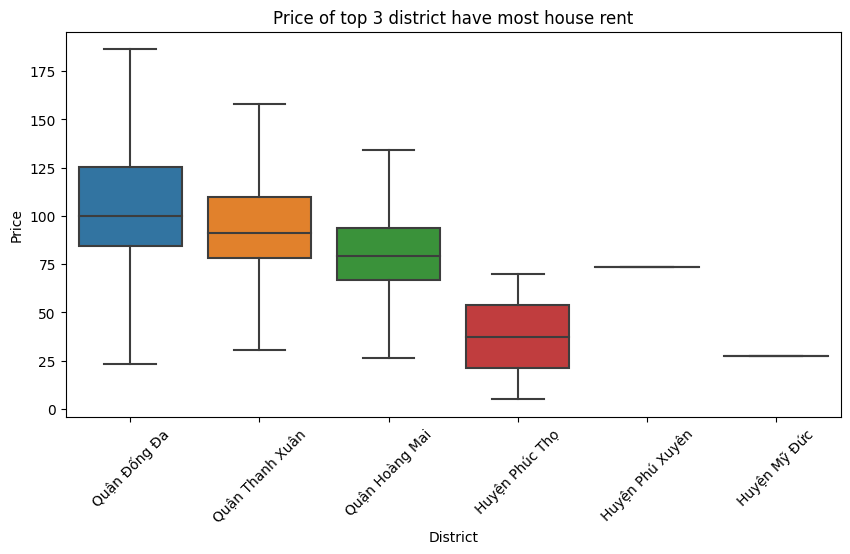

In [9]:
# Visualize compare price of top_3_district_highest and top_3_district_lowest using boxplot 
plt.figure(figsize=(10, 5))
sns.boxplot(x='district', y='price_per_m2', data=df[df['district'].isin([*top_3_district_highest, *top_3_district_lowest])], order=[*top_3_district_highest, *top_3_district_lowest], showfliers=False)
plt.xticks(rotation=45)
plt.xlabel('District')
plt.ylabel('Price')
plt.title('Price of top 3 district have most house rent')
plt.show()

##### Visualize compare acreage of houses for rent in top_5 district have highest number and lowest number of houses for rent in HCM city

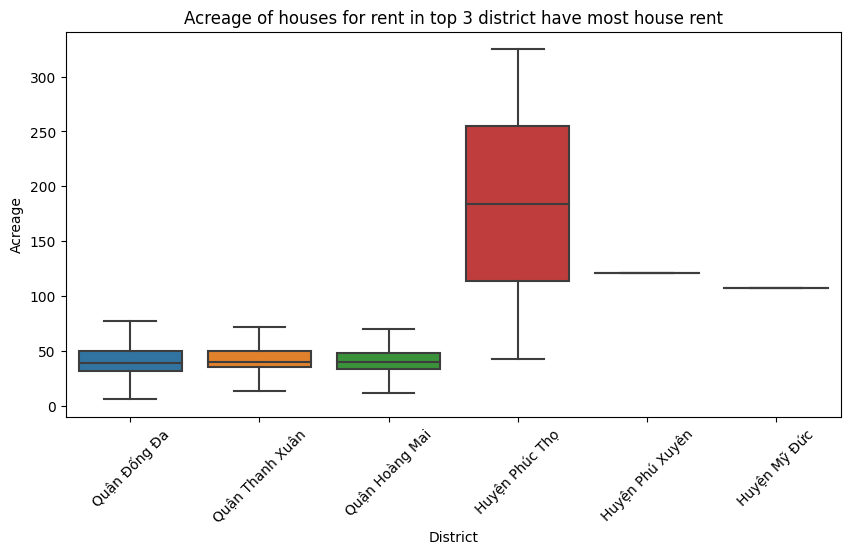

In [11]:
# Visualize compare acreage of houses for rent in top_5 district have highest number and lowest number of houses for rent in HCM city
plt.figure(figsize=(10, 5))
sns.boxplot(x='district', y='squares', data=df[df['district'].isin([*top_3_district_highest, *top_3_district_lowest])], order=[*top_3_district_highest, *top_3_district_lowest], showfliers=False)
plt.xticks(rotation=45)
plt.xlabel('District')  
plt.ylabel('Acreage')
plt.title('Acreage of houses for rent in top 3 district have most house rent')
plt.show()

&#9889; <font color="yellow"><b>What are benefits of finding the answer? </b></font>
>- Then after we can choose district to live in HCMC
>- We can know the number of rooms in each district and the proportion of rooms in each district, from which we can see which district has the most rooms, and why it has so many rooms (school, industrial area)
>- We can see "Quận Bình Thạnh" is most popular district in HCMC, and "Quận 1" is the least popular district in HCMC (because of the high price of rooms in "Quận 1"). And because `Quận Bình Thạnh` is near university school and price of rooms is not high and food is cheap, so it is the most popular district in HCMC.
>- And the district `Huyện Nhà Bè`, `Huyện Hóc Môn`, `Huyện Củ Chi`, `Huyện Bình Chánh` is the least popular district in HCMC (because of the far from center of HCMC and price of rooms is not high and food is cheap but job opportunities, the workers are not many and security is not good,... so it is the least popular district in HCMC).